First, let's get all the necessary programming libraries, that will allow us to do these computations. 

In [222]:
from bs4 import BeautifulSoup  # For processing XMLfrom BeautifulSoup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from math import floor
matplotlib.style.use('ggplot')

Next, let's read the XML file of the short story.

In [180]:
doc = open('garden-party.xml').read()
soup = BeautifulSoup(doc, 'lxml')

Read all the critical remarks.

In [11]:
interps = soup.findAll('interp')

These functions will extract the tags from the critical remarks. 

In [216]:
def getTags(interp): 
    descs = interp.findAll('desc')
    descList = []
    for desc in descs: 
        descList.append(desc.string)
    return descList

def getAllTags(interps):
    allTags = []
    for interp in interps: 
        tags = getTags(interp)
        for tag in tags: 
            allTags.append(tag)
    return allTags

Create a de-duplicated list of tags represented. 

In [217]:
def dedupe(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
allTags = dedupe(getAllTags(interps))
print(str(allTags))

['interruptions', 'medias-res', 'perfection', 'wind', 'colors', 'flora', 'green', 'coming-of-age', 'carnival', 'orientalism', 'butterflies', None, 'class', 'sexuality', 'eyes', 'desire', 'reminders', 'language', 'inversions', 'sounds', 'absurdity', 'play', 'flora ']


Create a table of all the tags, and where they occur according to lexia.

In [193]:
tagDict = {}
for interp in interps: 
    number = int(interp.attrs['n'])
    tags = getTags(interp)
    tagDict[number] = tags
tagDict

{1: ['interruptions', 'medias-res'],
 2: ['perfection'],
 3: ['wind', 'colors'],
 4: ['flora'],
 5: ['flora'],
 6: ['colors', 'green'],
 7: ['interruptions'],
 10: ['coming-of-age', 'carnival'],
 11: ['orientalism', 'colors', 'butterflies'],
 13: ['flora', 'butterflies'],
 14: [None],
 15: [None],
 16: ['butterflies'],
 17: [],
 18: ['class'],
 19: ['sexuality', 'eyes', 'desire'],
 20: ['reminders'],
 21: [],
 22: [],
 23: ['desire', 'language'],
 24: [],
 25: ['eyes'],
 26: ['class'],
 27: [],
 28: ['flora', 'colors', 'interruptions', 'perfection'],
 29: [],
 30: ['flora'],
 31: ['desire', 'class'],
 32: ['interruptions', 'class'],
 33: [],
 34: ['interruptions'],
 35: [],
 36: [],
 37: [],
 38: [],
 39: ['inversions'],
 40: [],
 41: ['reminders'],
 42: ['interruptions', 'perfection'],
 43: ['butterflies'],
 44: [],
 45: ['colors', 'green', 'sounds', 'class'],
 46: ['colors', 'sounds', 'absurdity'],
 47: ['play', 'wind'],
 48: ['play'],
 49: [],
 50: [],
 51: [],
 52: ['sexuality', 'f

Create a function for checking whether a tag is associated with a certain lexia.

In [194]:
def checkTags(tag):
    hasTags = []
    for n in tagDict: 
        if tag in tagDict[n]: 
            hasTags.append(1)
        else: 
            hasTags.append(0)
    return hasTags

Assemble a matrix of all tags, and whether they occur in certain lexia. Turn this into a data frame.

In [197]:
hasTagMatrix = {}
for tag in allTags: 
    hasTagMatrix[tag] = checkTags(tag)
df = pd.DataFrame(hasTagMatrix)

In [200]:
df.head()

,interruptions,language,green,medias-res,None,sexuality,colors,class,sounds,eyes,...,play,flora,butterflies,absurdity,inversions,wind,coming-of-age,orientalism,flora,perfection
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Group lexia by 10s, so the data are more meaningful than ones and zeroes.

In [201]:
def chunkdf(df, chunksize=10): 
    groups = df.groupby(lambda x: floor(x/chunkSize)).sum()
    return groups
groups = chunkdf(df)

Generate a line plot of all the tags and their occurences in 10-lexia blocks.

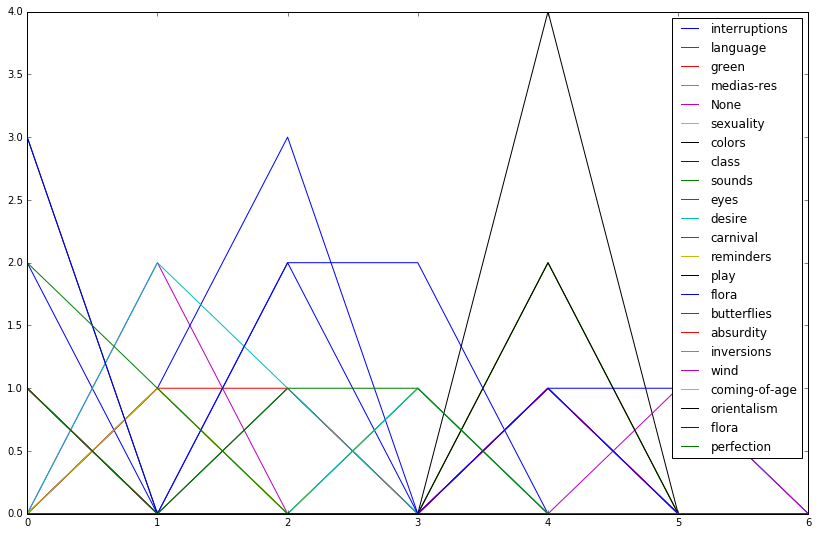

In [219]:
groups.plot(figsize=(14,9))

Since that chart is hard to read, let's examine subplots instead. Where do references to flora occur in the story (as interpreted by critics)? Do these co-occur with references to sexuality?

In [237]:
def plotTags(tags, thisdf=groups): 
    thisdf[tags].plot(kind='area', alpha=0.5, figsize=(10,5))

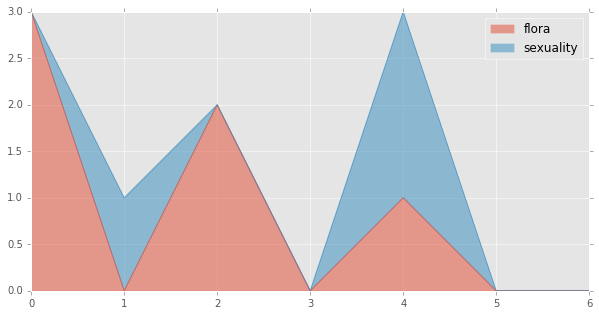

In [238]:
plotTags(['flora', 'sexuality'])

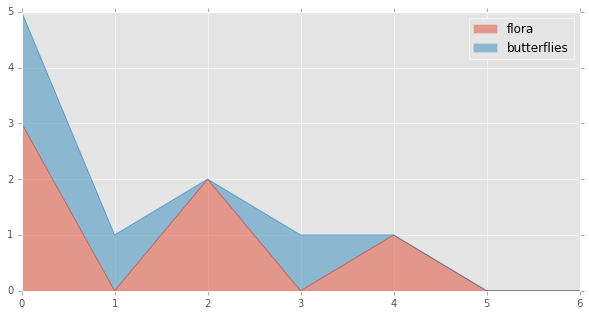

In [240]:
plotTags(['flora', 'butterflies'])

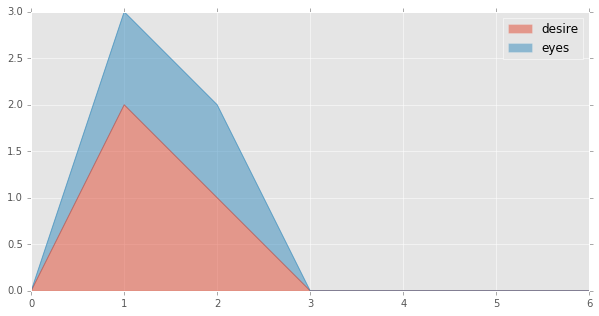

In [243]:
plotTags(['desire', 'eyes'])